<a href="https://colab.research.google.com/github/saadmarwan16/Tensorflow/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [6]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [7]:
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [8]:
i = Input(shape=x_train[0].shape, )
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5665 - accuracy: 0.4296 - val_loss: 1.3259 - val_accuracy: 0.5204
Epoch 2/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.2817 - accuracy: 0.5407 - val_loss: 1.1335 - val_accuracy: 0.5894
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1656 - accuracy: 0.5809 - val_loss: 1.0338 - val_accuracy: 0.6267
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0792 - accuracy: 0.6138 - val_loss: 1.0088 - val_accuracy: 0.6393
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0117 - accuracy: 0.6370 - val_loss: 1.0029 - val_accuracy: 0.6458
Epoch 6/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9468 - accuracy: 0.6651 - val_loss: 0.9558 - val_accuracy: 0.6678
Epoch 7/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8891 - accuracy: 0.6842 - val_loss: 0.8938 -

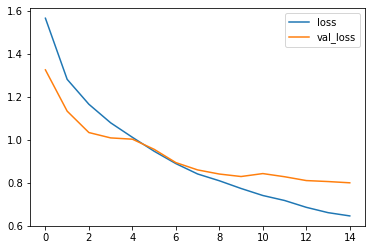

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

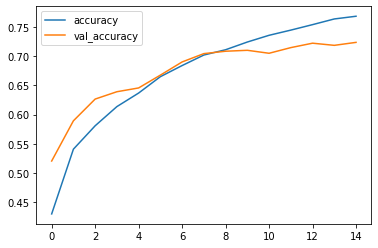

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();